# Diagnosing Pneumonia on Chest X-Rays

**In this exercise, we will build and train an chest X-ray image classification model (convolutional neural network - CNN) to predict whether an X-ray scan shows presence of pneumonia.**

In order to train model we will use this publicly-available dataset [Chest X-Ray Images (Pneumonia)](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?datasetId=17810).

This is a *classification* problem, because we're asking the algorithm to classify images into one of two classes: **normal or pneumonia**. We'll first train a convolutional neural network from scratch for this task, and then we will try transfer learning technique to improve the accuracy. You're then invited to try out the technique of 'transfer learning' on different architectures of convolutional neural networks, such as:

- VGG
- ResNet
- DensNet

In this exercise we'll learn how to:

- **Download data** and **load it into our Jupyter Notebook**
- **Import various libraries** like tensorflow and scikit-learn
- **Preprocess images properly for the train, validation and test sets**
- **Train a CNN from scratch**
- **Train a CNN using transfer learning**
- **Quantify the performance** of our model

## Part 1: Downloading and importing our data

### Option 1: Download directly from Kaggle
To train a machine learning model, the first thing we need is data.
For this exercise, we're using a dataset available on Kaggle. 

- You can view information about the dataset and download it [here](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?datasetId=17810). (You may need to create a Kaggle account.) *Note: we want version 2 of the dataset.*
- Create a directory with the name *input* in this Notebook's directory.
- Move the downloaded zip archive to the *input* directory.
- Unzip downloaded zip archive.

### Option 2: Download to Google Drive and connect with Google Colab
- Upload zip archive to your Google drive
- Connect your Google drive to Colab environment: 


If you're doing option 2, you can run the following code:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

- Unzip the archive

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

- Create folder **input** and move unzipped folder there

In [ ]:
!mkdir input
!mv chest_xray/ input/chest_xray

## Part 2: Install and import Packages and Functions
We'll make use of the following packages:

* numpy and pandas is what we'll use to manipulate our data
* matplotlib.pyplot and seaborn will be used to produce plots for visualization
* tensorflow and keras are used to build and train CNN
* scikit-learn is used to calculate metrics

Run the next cell to import all the necessary packages.



In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

In [3]:
import os
import shutil
import glob
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

os.listdir("input/chest_xray")

['test', 'chest_xray', '__MACOSX', 'train', 'val']

In [4]:
len(os.listdir("input/chest_xray/train/PNEUMONIA"))

3294

## Part 3:  Data Analysis and Visualization


The dataset is divided into three sets: 1) Train set 2) Validation set and 3) Test set.

Let's check how many images we have in every set

In [5]:
train_dir = "input/chest_xray/train"
test_dir = "input/chest_xray/test"
val_dir = "input/chest_xray/val"

train_imgs_pneumonia = os.listdir(os.path.join(train_dir, 'PNEUMONIA'))
train_imgs_normal = os.listdir(os.path.join(train_dir, 'NORMAL'))
num_train_pneumonia = len(train_imgs_pneumonia)
num_train_normal = len(train_imgs_normal)
print("Train set:")
print(f"PNEUMONIA={num_train_pneumonia}")
print(f"NORMAL={num_train_normal}")
print("========================================")

test_imgs_pneumonia = os.listdir(os.path.join(test_dir, 'PNEUMONIA'))
test_imgs_normal = os.listdir(os.path.join(test_dir, 'NORMAL'))
num_test_pneumonia = len(test_imgs_pneumonia)
num_test_normal = len(test_imgs_normal)
print("Test set:")
print(f"PNEUMONIA={num_test_pneumonia}")
print(f"NORMAL={num_test_normal}")
print("========================================")

val_imgs_pneumonia = os.listdir(os.path.join(val_dir, 'PNEUMONIA'))
val_imgs_normal = os.listdir(os.path.join(val_dir, 'NORMAL'))
num_val_pneumonia = len(val_imgs_pneumonia)
num_val_normal = len(val_imgs_normal)
print("Validation set:")
print(f"PNEUMONIA={num_val_pneumonia}")
print(f"NORMAL={num_val_normal}")
print("========================================")


Train set:
PNEUMONIA=3294
NORMAL=1140
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=589
NORMAL=209


### Split on train/val dataset
The validation set in the original dataset consists of only 16 images. Let's enlarge it by moving some of the images from training dataset.

A general rule is to spilt dataset on train, validation and test sets in proportion: 70-80%:10-20%:5-10%

Run the next two cells only once, if you haven't already enlarged the validation dataset.

In [6]:
val_proportion = 0.15
random_nums_pneumonia = random.sample(range(num_train_pneumonia), int(num_train_pneumonia * val_proportion))
random_nums_normal= random.sample(range(num_train_normal), int(num_train_normal * val_proportion))

In [7]:
for num in random_nums_pneumonia:
    shutil.move(os.path.join(train_dir, 'PNEUMONIA', train_imgs_pneumonia[num]), os.path.join(val_dir, 'PNEUMONIA'))

for num in random_nums_normal:
    shutil.move(os.path.join(train_dir, 'NORMAL', train_imgs_normal[num]), os.path.join(val_dir, 'NORMAL'))

In [8]:
train_imgs_pneumonia = os.listdir(os.path.join(train_dir, 'PNEUMONIA'))
train_imgs_normal = os.listdir(os.path.join(train_dir, 'NORMAL'))
num_train_pneumonia = len(train_imgs_pneumonia)
num_train_normal = len(train_imgs_normal)
print("Train set:")
print(f"PNEUMONIA={num_train_pneumonia}")
print(f"NORMAL={num_train_normal}")
print("========================================")

test_imgs_pneumonia = os.listdir(os.path.join(test_dir, 'PNEUMONIA'))
test_imgs_normal = os.listdir(os.path.join(test_dir, 'NORMAL'))
num_test_pneumonia = len(test_imgs_pneumonia)
num_test_normal = len(test_imgs_normal)
print("Test set:")
print(f"PNEUMONIA={num_test_pneumonia}")
print(f"NORMAL={num_test_normal}")
print("========================================")

val_imgs_pneumonia = os.listdir(os.path.join(val_dir, 'PNEUMONIA'))
val_imgs_normal = os.listdir(os.path.join(val_dir, 'NORMAL'))
num_val_pneumonia = len(val_imgs_pneumonia)
num_val_normal = len(val_imgs_normal)
print("Validation set:")
print(f"PNEUMONIA={num_val_pneumonia}")
print(f"NORMAL={num_val_normal}")
print("========================================")

Train set:
PNEUMONIA=2800
NORMAL=969
Test set:
PNEUMONIA=390
NORMAL=234
Validation set:
PNEUMONIA=1083
NORMAL=380


### Visualise images

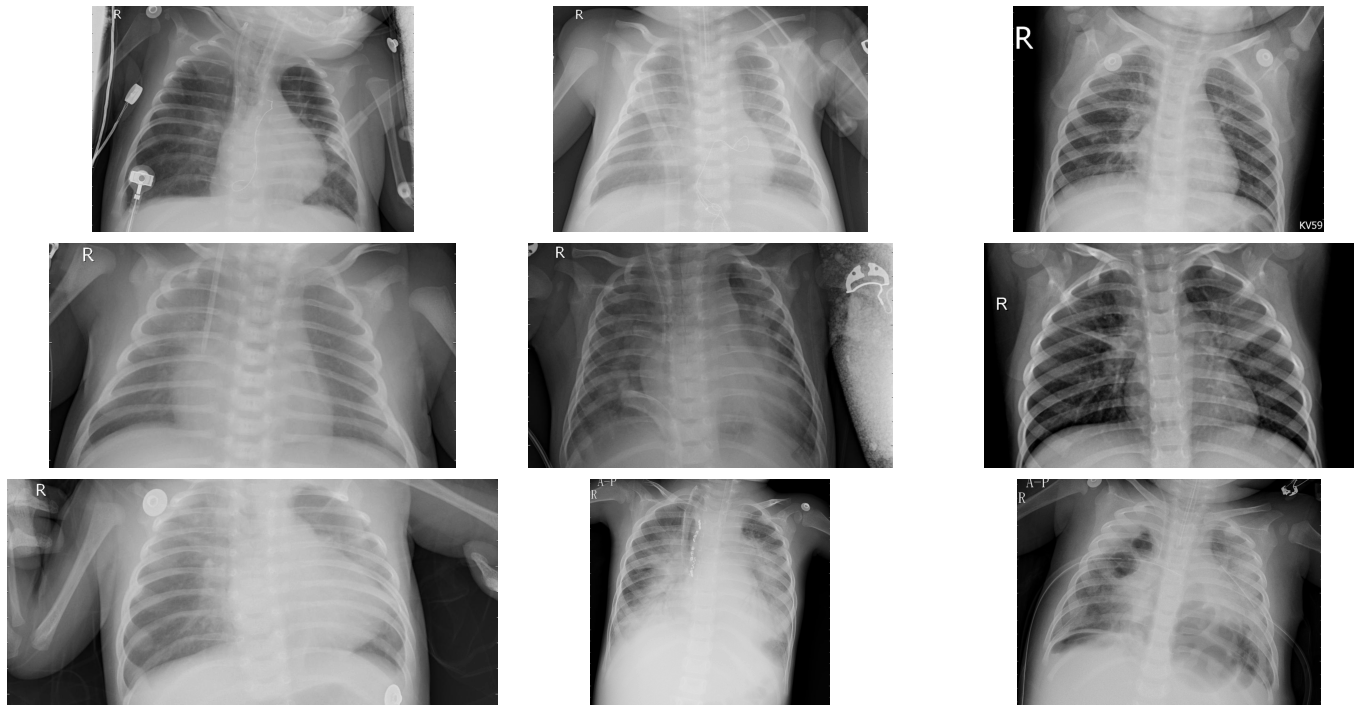

In [9]:
pneumonia = os.listdir("input/chest_xray/train/PNEUMONIA")
pneumonia_dir = "input/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

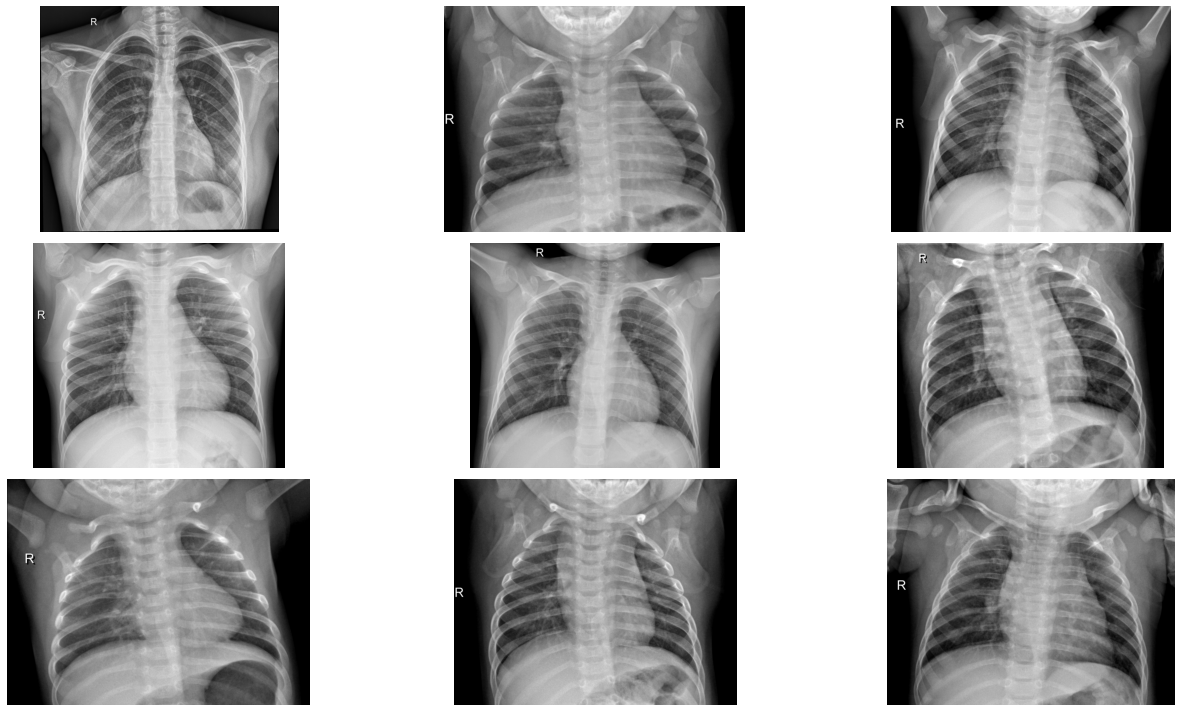

In [10]:
normal = os.listdir("input/chest_xray/train/NORMAL")
normal_dir = "input/chest_xray/train/NORMAL"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

### Image analysis

Let's check some statisctics of the images in the dataset

The dimensions of the image are 2234 pixels width and 2359 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 124.3910 and the standard deviation is 56.3308


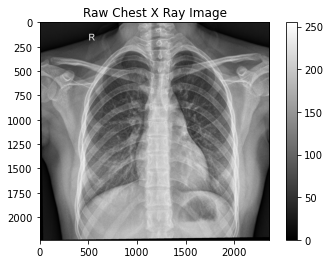

In [11]:
normal_img = os.listdir("input/chest_xray/train/NORMAL")[0]
normal_dir = "input/chest_xray/train/NORMAL"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

### Investigate pixel value distribution

Text(0, 0.5, '# Pixels in Image')

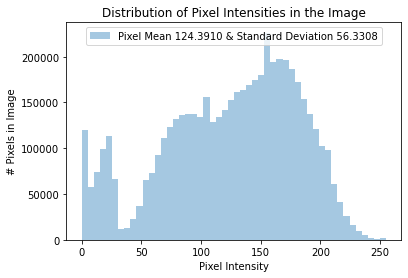

In [13]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

## Part 4:  Data Preprocessing
Before training, we'll modify images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images.
We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution).
The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [14]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

### Build a separate generator for valid and test sets

Now we need to build a new generator for validation and testing data.

Why can't use the same generator as for the training data?

Look back at the generator we wrote for the training data.

It normalizes each image per batch, meaning that it uses batch statistics.
We should not do this with the test and validation data, since in a real life scenario we don't process incoming images a batch at a time (we process one image at a time).
Knowing the average per batch of test data would effectively give our model an advantage (The model should not have any information about the test data).
What we need to do is to normalize incomming test data using the statistics computed from the training set.

In [15]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 3769 images belonging to 2 classes.
Found 1463 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 3.6269 and the minimum is -3.6753
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


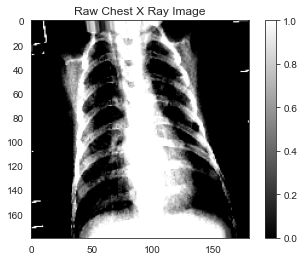

In [16]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

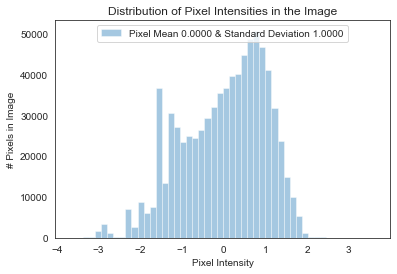

In [17]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

## Part 5:  Building a CNN model

### Pneumonia Detection with Convolutional Neural Networks
Computer Vision can be performed using Convolutional neural networks (CNN). They are neural networks which perform features extraction over an image before classifying it. The feature extraction performed consists of three basic operations:

* Filter an image for a particular feature (convolution)
* Detect that feature within the filtered image (using the ReLU activation)
* Condense the image to enhance the features (maximum pooling)

### The convolution process is illustrated below

![download.png](media/convolution.png)

Using convolution filters with different dimensions or values results in differents features extracted

Features are then detected using the reLu activation on each destination pixel.

![download1.png](media/relu.png)

Features are the enhanced with MaxPool layers
![download2.png](media/maxpool.png)

The outputs are then concatened in Dense layers

![download4.png](media/dense.png)

By using a sigmoid activation, the neural network determines which class the image belongs to
![download5.png](media/sigmoid.png)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


The model is compiled using the following code:

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

This tells the model how to learn. We're using “binary_crossentropy” as the loss to minimise as the output is binary (pneumonia or nomal, 1 or 0).

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 118336)            0         
                                                                 
 dense (Dense)               (None, 128)               1

### Impact of imbalance data on loss function

Loss Function:
$$\mathcal{L}_{cross-entropy}(x_i) = -(y_i \log(f(x_i)) + (1-y_i) \log(1-f(x_i))),$$

We can rewrite the the overall average cross-entropy loss over the entire training set `D` of size `N` as follows:
$$\mathcal{L}_{cross-entropy}(\mathcal{D}) = - \frac{1}{N}\big( \sum_{\text{positive examples}} \log (f(x_i)) + \sum_{\text{negative examples}} \log(1-f(x_i)) \big).$$



When we have an imbalance data, using a normal loss function will result a model that bias toward the dominating class. One solution is to use a weighted loss function. Using a weighted loss function will balance the contribution in the loss function.

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

In [21]:
# Class weights

weight_for_0 = num_train_pneumonia / (num_train_normal + num_train_pneumonia)
weight_for_1 = num_train_normal / (num_train_normal + num_train_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.74
Weight for class 1: 0.26


The model is then run with the **model.fit** method:

In [22]:
r = model.fit(
    train, 
    epochs=10,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/10


2023-04-12 16:45:51.663367: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


100/100 [==============================] - 9s 85ms/step - loss: 0.2740 - accuracy: 0.7465 - val_loss: 0.1694 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 9s 86ms/step - loss: 0.1232 - accuracy: 0.8500 - val_loss: 0.2154 - val_accuracy: 0.9200
Epoch 3/10
100/100 [==============================] - 8s 84ms/step - loss: 0.1163 - accuracy: 0.8852 - val_loss: 0.0546 - val_accuracy: 0.9600
Epoch 4/10
100/100 [==============================] - 9s 86ms/step - loss: 0.0938 - accuracy: 0.9062 - val_loss: 0.2861 - val_accuracy: 0.8400
Epoch 5/10
100/100 [==============================] - 9s 86ms/step - loss: 0.1000 - accuracy: 0.8900 - val_loss: 0.6954 - val_accuracy: 0.6800
Epoch 6/10
100/100 [==============================] - 9s 89ms/step - loss: 0.0912 - accuracy: 0.9162 - val_loss: 0.1969 - val_accuracy: 0.8800
Epoch 7/10
100/100 [==============================] - 9s 90ms/step - loss: 0.1067 - accuracy: 0.8700 - val_loss: 0.1220 - val_accuracy: 0.9600
Epoch 8/10

Text(0.5, 1.0, 'Accuracy Evolution')

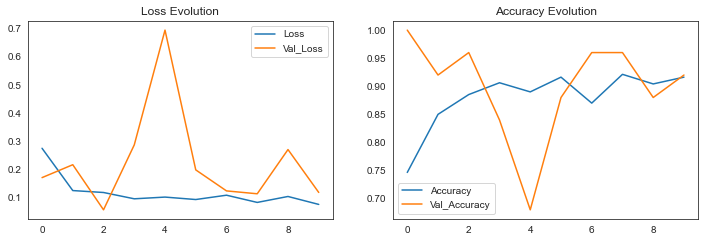

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

624/624 [==============================] - 5s 9ms/step - loss: 0.3526 - accuracy: 0.8638
Test Accuracy: 86.38%
143/472 [========>.....................] - ETA: 21s - loss: 0.2285 - accuracy: 0.9135

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

In [ ]:
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

## Part 6:  Transfer Learning


Transfer learning is a machine learning technique where a model trained on one task is re-purposed on a second related task.

### The tranfer learning process is illustrated below

![download.png](media/transfer_learning.png)

### VGG16
Presented in 2014, VGG16 has a very simple and classical architecture, with blocks of 2 or 3 convolutional layers followed by a pooling layer, plus a final dense network composed of 2 hidden layers (of 4096 nodes each) and one output layer (of 1000 nodes). Only 3x3 filters are used.

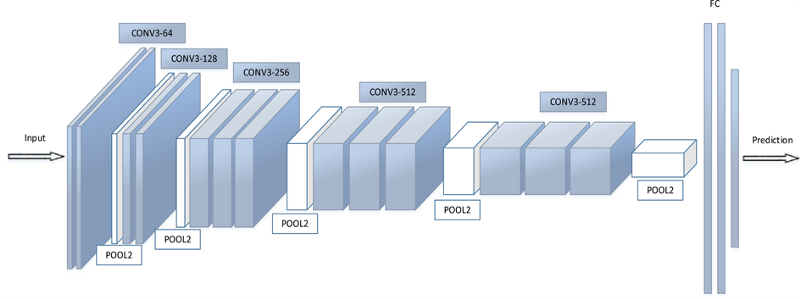

First we load already pre-trained VGG16 on the ImageNet dataset.

You can read more about the ImageNet dataset here: https://paperswithcode.com/dataset/imagenet

Also we make the weights inside this CNN non-trainable, so during training they will not be updated. This will allow as to train model much faster

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.models import Model
from keras import backend as K
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')
vgg16_base_model.trainable = False
    


In [ ]:
vgg16_base_model.summary()

In [ ]:
layers = vgg16_base_model.layers
print(f"The model has {len(layers)} layers")

In [ ]:
print(f"The input shape {vgg16_base_model.input}")
print(f"The output shape {vgg16_base_model.output}")

On top of base VGG16 model with non-trainable weights we add more layers which will be trainable.

In [ ]:

vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1,activation="sigmoid")
    ])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
vgg16_model.compile(optimizer=opt,loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = vgg16_model.fit(train,
          epochs=10,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=100,
          validation_steps=25)



In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

### Evaluation

In [ ]:
predicted_vals = model.predict(test, steps=len(test))

In [ ]:
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

### DenseNet
Densenet is a convolutional network where each layer is connected to all other layers that are deeper in the network:

* The first layer is connected to the 2nd, 3rd, 4th etc.
* The second layer is conected to the 3rd, 4th, 5th etc.

For more information about the DenseNet Architecture visit this website : https://keras.io/api/applications/densenet/

In [ ]:
from keras.applications.densenet import DenseNet121
base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

### ResNet

See the full explanation and schemes in the Research Paper on Deep Residual Learning (https://arxiv.org/pdf/1512.03385.pdf)

In [ ]:
from keras.applications import ResNet50

### InceptionNet
Also known as GoogleNet, this architecture presents sub-networks called inception modules, which allows fast training computing, complex patterns detection, and optimal use of parameters

for more information visit https://static.googleusercontent.com/media/research.google.com/en//pubs/archive/43022.pdf



In [ ]:
from keras.applications import InceptionV3


## Next Steps

Have a go at modifying our first model, including:

- Different layers (BatchNormalisation, Dropout). More info about available layers: https://www.tensorflow.org/api_docs/python/tf/keras/layers
- Different hyperparameters (such as different learning rates and number of layers, etc.)
- Diffrent augmentations
- Different loss functions

Also try to run transfer learning with other base models such as:
- DenseNet
- ResNet
- InceptionNet

Fill out the form below and we'll provide feedback on your code.

**Any feedback on the exercise? Any questions? Want feedback on your code? Please fill out the form [here](https://docs.google.com/forms/d/e/1FAIpQLSdoOjVom8YKf11LxJ_bWN40afFMsWcoJ-xOrKhMbfBzgxTS9A/viewform).**